## import libraries 

In [11]:
import pandas
import configparser
import psycopg2

In [12]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [13]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

## create the hosue table

make sure change the schema name to your gp number

In [9]:


# replace the schema and table name to your schema and table name
table_sql = """
            CREATE TABLE IF NOT EXISTS gp5.house
            (

                price integer,
                bed integer,
                bath integer,
                area integer,
                address VARCHAR(200),
                PRIMARY KEY(address)
            );

            """



use the bellow cell only if you want to delete the table

In [10]:
conn.rollback()
#table_sql="drop table if exists demo.house"

In [14]:

cur.execute(table_sql)
conn.commit()

## define the search region

In [15]:
url = "https://www.trulia.com/VA/Ashburn/20148/"

In [16]:


import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()
print(html_data.decode('utf-8'))



<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                c

In [17]:


from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
print (soup)



<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                

## insert the records into database

In [20]:

for li_class in soup.find_all('li', class_ = 'Grid__CellBox-sc-144isrp-0 SearchResultsList__WideCell-b7y9ki-2 jiZmPM'):
    try:
        for price_div in li_class.find_all('div',{'data-testid':'property-price'}):
            price =int(price_div.text.replace('$','').replace(",",""))
        for bed_div in li_class.find_all('div', {'data-testid':'property-beds'}):
            bed= int(bed_div.text.replace('bd','').replace(",",""))
        for bath_div in li_class.find_all('div',{'data-testid':'property-baths'}):
            bath =int(bath_div.text.replace('ba','').replace(",",""))
        for area_div in li_class.find_all('div',{'data-testid':'property-floorSpace'}):
            area=int(area_div.text.split('sqft')[0].replace(",",""))
        for address_div in li_class.find_all('div',{'data-testid':'property-address'}):
            address =address_div.text

        try:
            sql_insert = """
                        insert into gp5.house(price,bed,bath,area,address)
                        values('{}','{}','{}','{}','{}')            
                        """.format(price,bed,bath,area,address)

            cur.execute(sql_insert)
            conn.commit()
        except:
            conn.rollback()
    except:
        pass
        

## Query the Table

In [21]:
df = pandas.read_sql_query('select * from gp5.house ', conn)
df[:10]

,price,bed,bath,area,address
0,635000,3,3,2592,"42898 Sandy Quail Ter, Ashburn, VA 20148"
1,564990,3,3,2157,"8 Demott Dr, Ashburn, VA 20148"
2,1649000,6,6,6200,"22079 Auction Barn Dr, Ashburn, VA 20148"
3,470000,3,3,2509,"42605 Cardinal Trace Ter #10L, Ashburn, VA 20148"
4,809000,3,3,2836,"42758 Autumn Day Ter, Ashburn, VA 20148"
5,912000,5,4,3416,"42092 Creighton Rd, Ashburn, VA 20148"
6,689000,3,4,2296,"22255 Sims Ter, Ashburn, VA 20148"
7,355500,3,2,1346,"22607 Blue Elder Ter #102, Brambleton, VA 20148"
8,949000,4,5,4456,"23181 Hanworth St, Ashburn, VA 20148"
9,2300000,8,10,9727,"41219 Traminette Ct, Ashburn, VA 20148"


## basic stat

In [22]:
df.describe()

,price,bed,bath,area
count,3.300000e+01,33.000000,33.000000,33.000000
mean,8.220493e+05,3.636364,4.000000,3197.696970
std,4.987485e+05,1.245446,1.600781,2247.931264
min,2.900000e+05,2.000000,2.000000,1099.000000
25%,5.889500e+05,3.000000,3.000000,2164.000000
50%,6.900000e+05,3.000000,4.000000,2710.000000
75%,8.571660e+05,4.000000,4.000000,3244.000000
max,2.499900e+06,8.000000,10.000000,12000.000000


## price distribution

<AxesSubplot:>

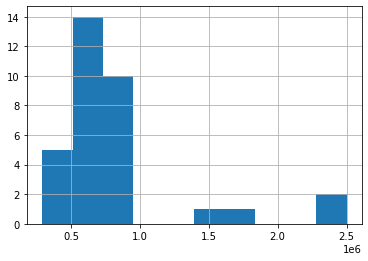

In [23]:
df['price'].hist()

## bed vs bath

<AxesSubplot:xlabel='bed', ylabel='bath'>

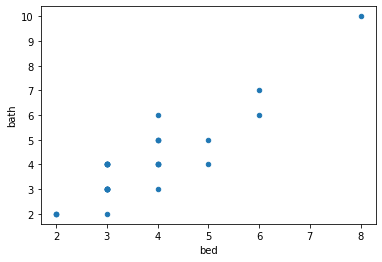

In [24]:
df.plot.scatter(x='bed',y='bath')